In [12]:
import musdb
import pathlib

# 'cs7643' project root
root = pathlib.Path().resolve()
while root.name != 'cs7643' and root.parent != root:
    root = root.parent
project_root = root
print(f"Project root: {project_root}")

# relative data path
data_dir = project_root / 'data' / 'musdb18hq'
print(f"Using MUSDB root: {data_dir}")

# Load train dataset for visualization
mus = musdb.DB(
    root=str(data_dir),
    is_wav=True,
    subsets=['train']
)
print(f"Number of train tracks: {len(mus.tracks)}")

# first track
track = mus.tracks[0]
print("First track:", track)

Project root detected at: /Users/Owen/Documents/Georgia Tech/Deep Learning/cs7643
Using MUSDB root: /Users/Owen/Documents/Georgia Tech/Deep Learning/cs7643/data/musdb18hq
Number of train tracks: 100
First track: A Classic Education - NightOwl



| Attribute         | Description                                                                   |
| ----------------- | ----------------------------------------------------------------------------- |
| `track.name`      | The track’s name                                                              |
| `track.subset`    | 'train' or 'test'                                                             |
| `track.path`      | Full path to the mixture file                                                 |
| `track.rate`      | Sample rate (typically 44100 Hz)                                              |
| `track.nchannels` | Number of audio channels (typically 2)                                        |
| `track.duration`  | Duration of the track in seconds                                              |
| `track.stems`     | Number of stems (5: mixture + 4 sources)                                      |
| `track.audio`     | The full mixture audio (samples, channels)                                    |
| `track.targets`   | A dictionary of stem sources, e.g. {"vocals": Source, "drums": Source, ...}   |
| `track.metadata`  | Additional metadata (artist, title, ISRC, etc. — varies)                      |


Note - Left channel / Right channel can be thought of as spatial sound so what would play out of a left earbud or a right earbud

Project root detected at: /Users/Owen/Documents/Georgia Tech/Deep Learning/cs7643


/var/folders/ym/89sc9pq96fjdh1wphct4f2x00000gn/T/ipykernel_50030/1863156973.py:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  spec = torch.load(file_path).squeeze().cpu()

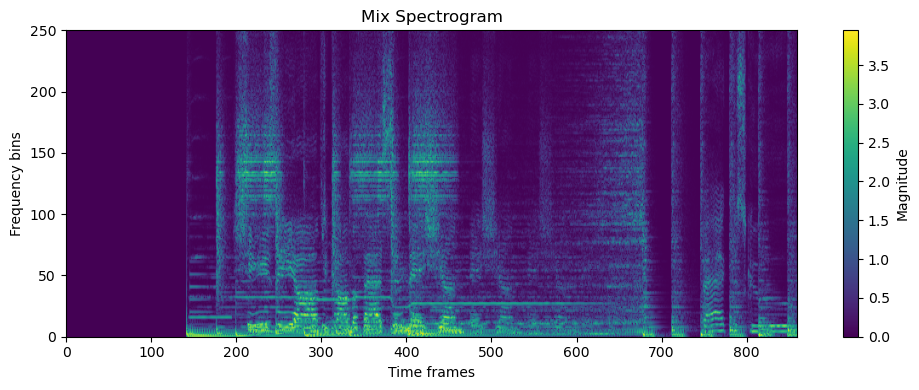

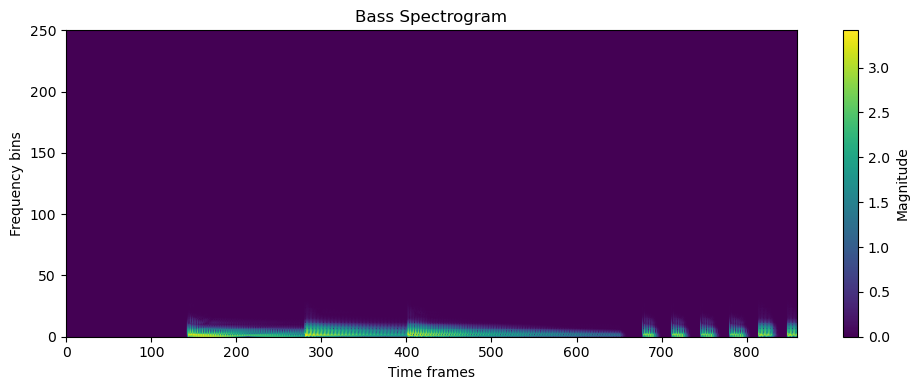

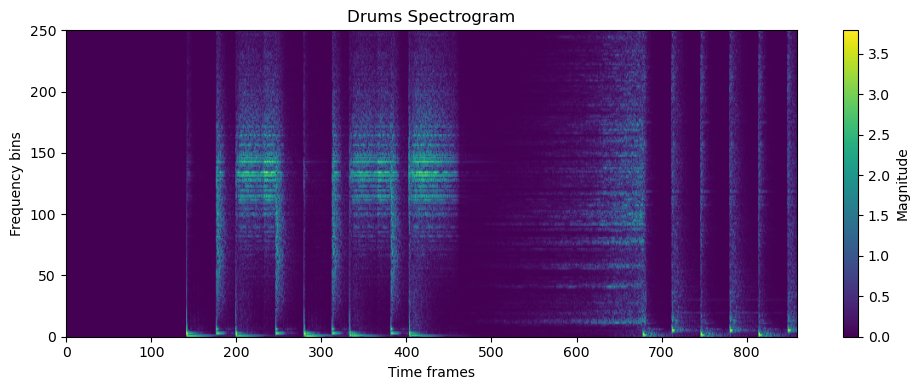

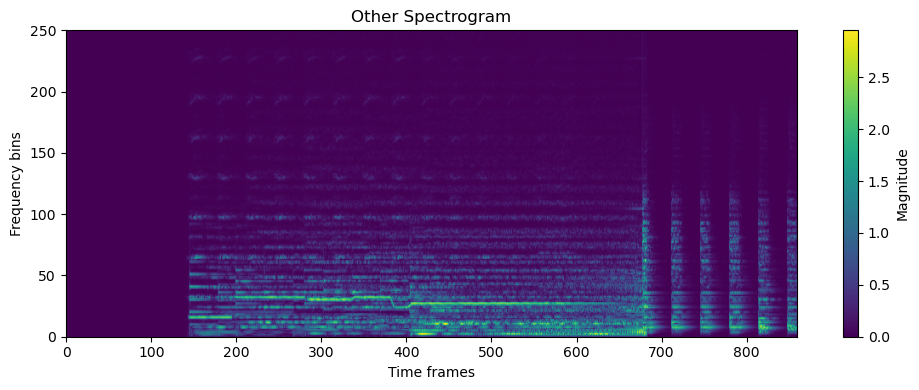

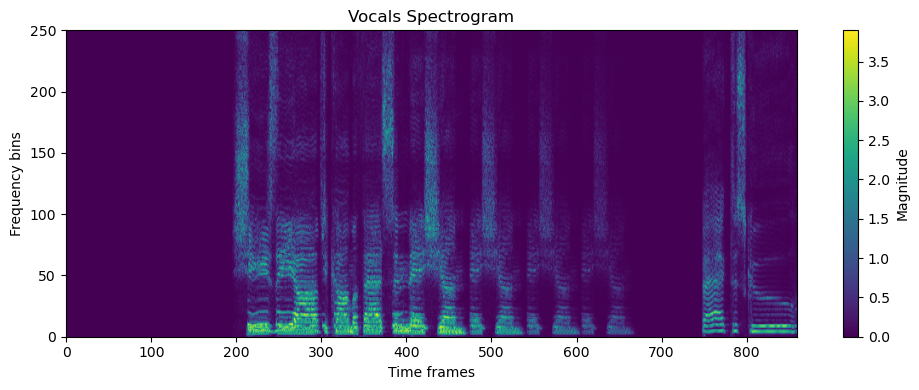

In [15]:
import torch
import matplotlib.pyplot as plt
from pathlib import Path


# Example clip for processing
base_path = project_root / 'data' / 'musdb18hq' / 'spectrograms' / 'test' / 'Al James - Schoolboy Facination'
clip_id = 'clip_000'
stems = ['mix', 'bass', 'drums', 'other', 'vocals']

def plot_spectrograms(base, clip_id, stems, ylim=None, figsize=(10, 4)):
    """
    Load and plot spectrograms for given stems in a clip.
    """
    clip_dir = base / clip_id
    for stem in stems:
        file_path = clip_dir / f"{stem}.pt"
        spec = torch.load(file_path).squeeze().cpu().numpy()

        plt.figure(figsize=figsize)
        plt.imshow(spec, aspect='auto', origin='lower')
        if ylim:
            plt.ylim(*ylim)
        plt.title(f"{stem.capitalize()} Spectrogram")
        plt.colorbar(label="Magnitude")
        plt.xlabel("Time frames")
        plt.ylabel("Frequency bins")
        plt.tight_layout()
        plt.show()

tt = plot_spectrograms(base_path, clip_id, stems, ylim=(0, 250))


In [18]:
print(f"Name: {track.name}")
print(f"Subset: {track.subset}")
print(f"Path: {track.path}")
print(f"Sample rate: {track.rate} Hz")
print(f"Channels: {track.audio.shape[1]}")
print(f"Duration: {track.duration:.2f} s")
print(f"Audio shape: {track.audio.shape}")
print(f"Targets: {list(track.targets.keys())}")
print(f"Stems: {track.stems[0:1]}")

Name: A Classic Education - NightOwl
Subset: train
Path: /Users/Owen/Documents/Georgia Tech/Deep Learning/Final_Project/data/musdb18hq/train/A Classic Education - NightOwl/mixture.wav
Sample rate: 44100 Hz
Channels: 2
Duration: 171.44 s
Audio shape: (7560512, 2)
Targets: ['vocals', 'drums', 'bass', 'other', 'accompaniment', 'linear_mixture']
Stems: [[[-0.00140381 -0.00241089]
  [-0.00140381 -0.00241089]
  [-0.00216675 -0.00289917]
  ...
  [ 0.00012207  0.        ]
  [ 0.         -0.00015259]
  [ 0.         -0.00015259]]]


7560512

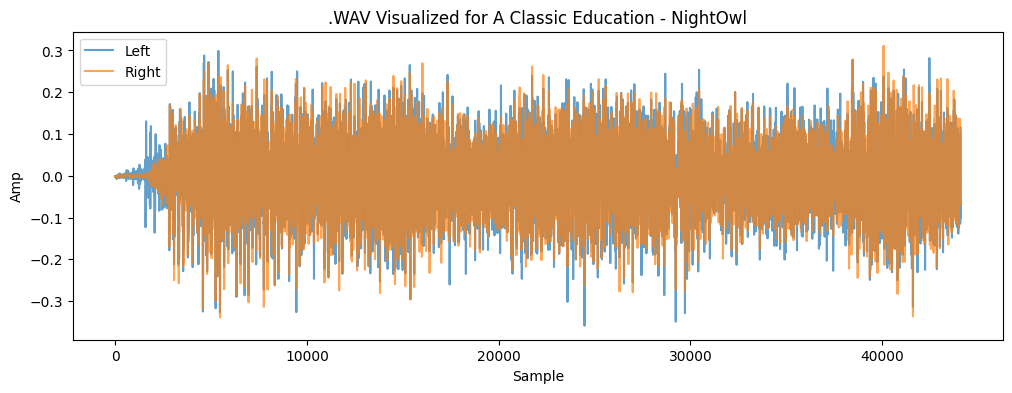

In [16]:
import matplotlib.pyplot as plt

audio = track.audio
samples_to_plot = 44100  # 1 second at 44100 Hz

plt.figure(figsize=(12, 4))
plt.plot(audio[:samples_to_plot, 0], label='Left', alpha=0.7)
plt.plot(audio[:samples_to_plot, 1], label='Right', alpha=0.7)
plt.title(f".WAV Visualized for {track.name}")
plt.xlabel("Sample")
plt.ylabel("Amp")
plt.legend()



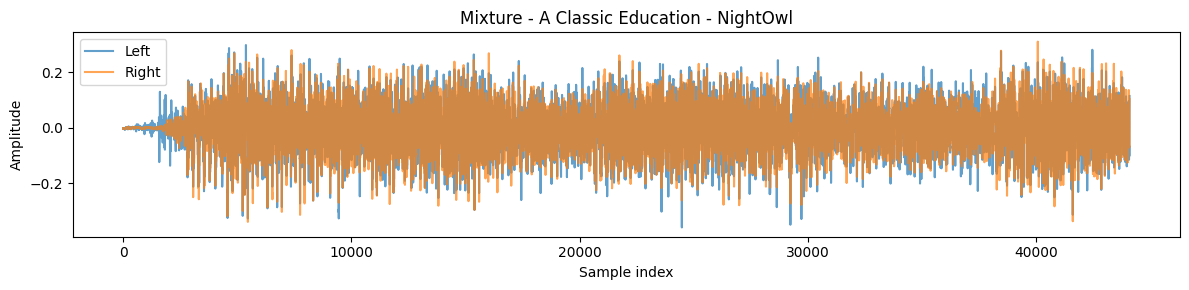

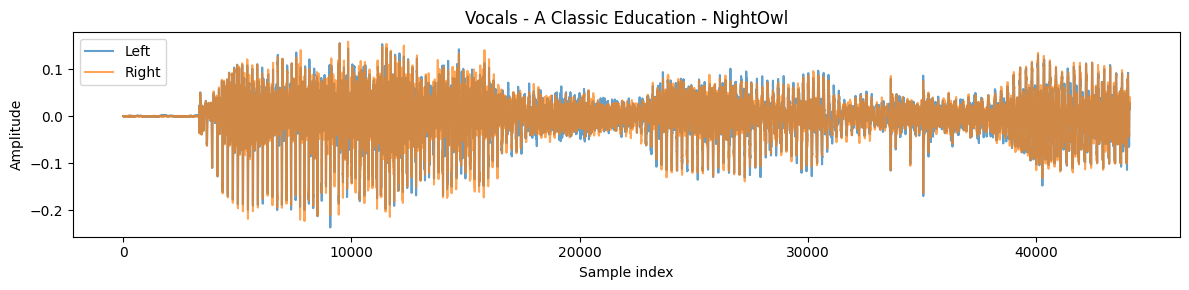

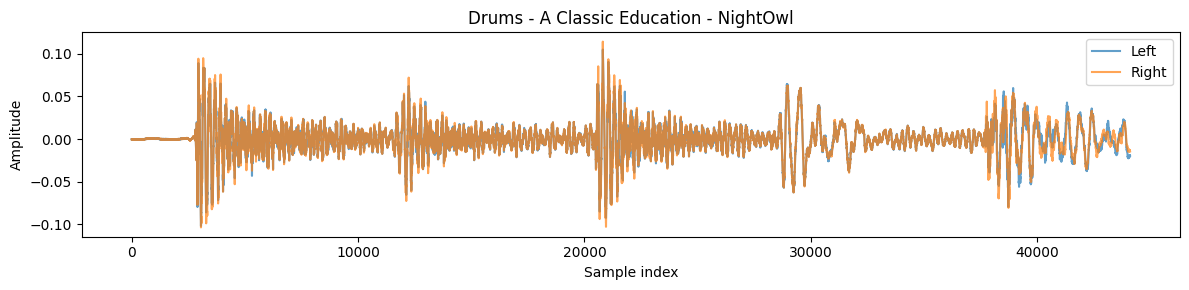

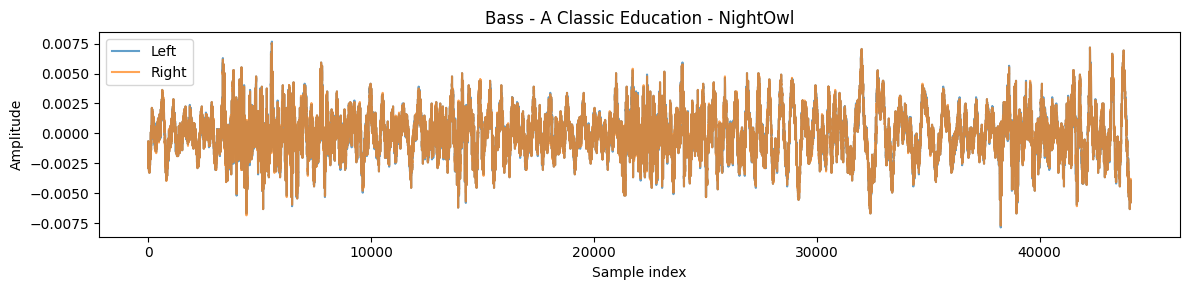

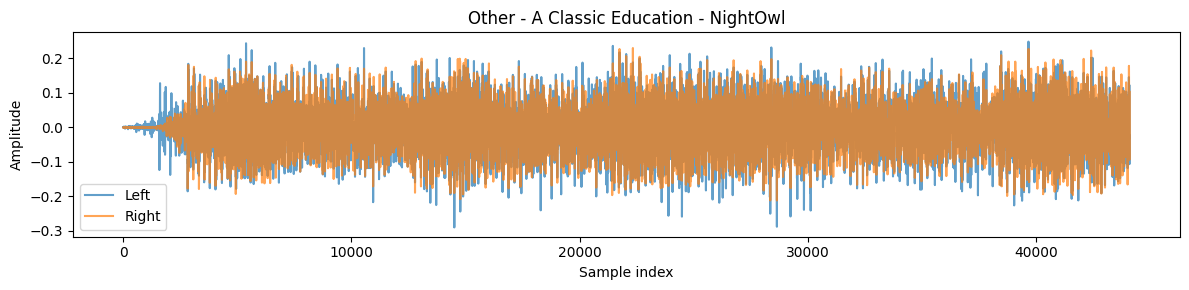

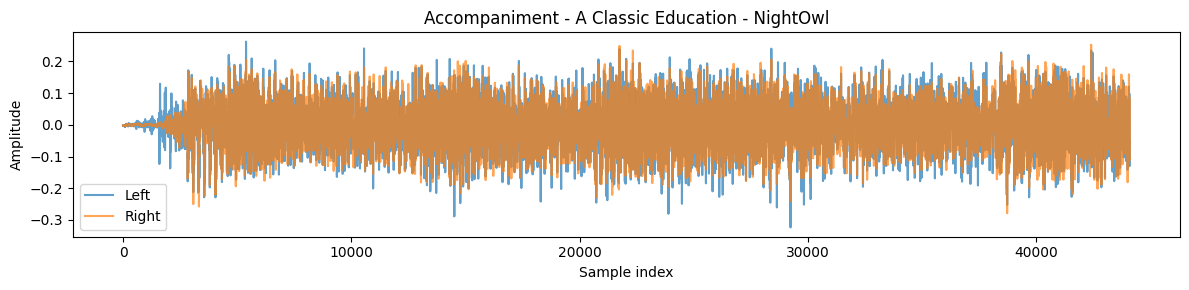

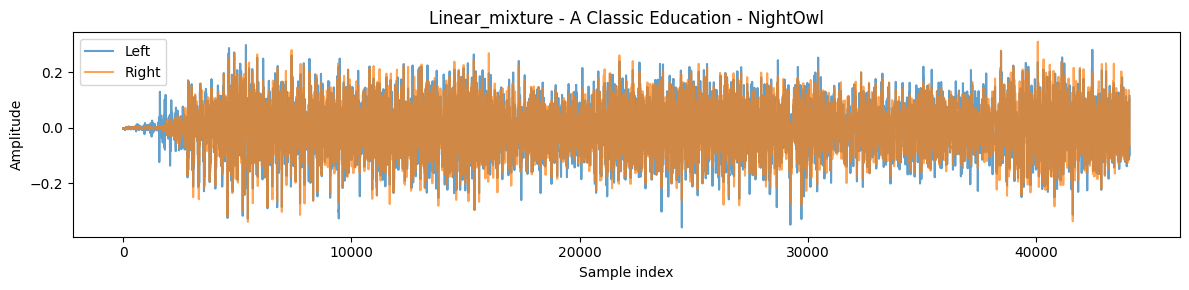

In [17]:
def plot_stereo(audio, title, samples_to_plot):
    plt.figure(figsize=(12, 3))
    plt.plot(audio[:samples_to_plot, 0], label="Left", alpha=0.7)
    plt.plot(audio[:samples_to_plot, 1], label="Right", alpha=0.7)
    plt.title(title)
    plt.xlabel("Sample index")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_stereo(track.audio, f"Mixture - {track.name}", samples_to_plot)

for target_name, target in track.targets.items():
    plot_stereo(target.audio, f"{target_name.capitalize()} - {track.name}", samples_to_plot)